In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pymcfost as mcfost
import os
from astropy.io import fits
import aplpy

rcParams['figure.figsize'] = (5,2)

/home/jhyl3/.conda/envs/pyspedas/lib/python3.12/site-packages/pymcfost/SED.py:10: UserWarning: mpl_scatter_density is not present
  warnings.warn("mpl_scatter_density is not present", UserWarning)


In [4]:
path = '/home/jhyl3/Documents/mcfost_testing/default_settling'
# input = fits.open('box_density.fits')

model = mcfost.SED(path+"/data_th/")
image_1um = mcfost.Image(path+"/data_1.0/")
mass_density = fits.open(path+"/data_disk/dust_mass_density.fits.gz")
number_density = fits.open(path+'/data_disk/dust_particle_density.fits.gz')
gas_density = fits.open(path+'/data_disk/gas_density.fits.gz')
temp = fits.open(path+'/data_th/Temperature.fits.gz')
grid = fits.open(path+'/data_disk/grid.fits.gz')

In [5]:
P = grid[0].header['NAXIS1']
N = grid[0].header['NAXIS2']

R = grid[0].data[0,0,0]
Z = np.linspace(0,10,N)

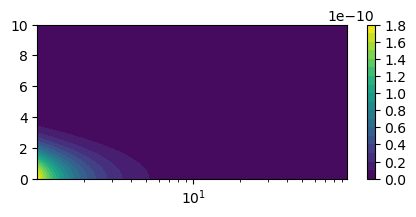

In [8]:
# plt.contourf(R, Z, gas_density[0].data / 100 / mass_density[0].data -1, cmap='viridis', levels=20)
plt.contourf(R, Z, gas_density[0].data, cmap='viridis', levels=20)
plt.xscale('log')
plt.colorbar()

In [22]:
plt.contourf(R,Z, np.sum(input[0].data, axis=0)[0], levels=20, cmap='coolwarm')
plt.colorbar()

TypeError: 'method' object is not subscriptable

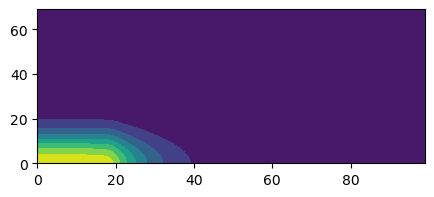

In [25]:
# number density
plt.contourf(number_density[0].data[0])

(50.0, 100.0)

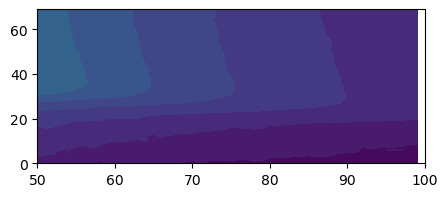

In [26]:
# temperature
# rcParams['figure.figsize'] = (10,4)
plt.contourf(temp[0].data, levels=20)
plt.xlim(50,100)

(1e-14, 1.3526964650721959e-11)

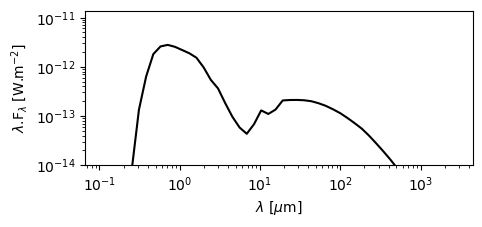

In [27]:
# SED
model.plot(0)
plt.ylim(1e-14)

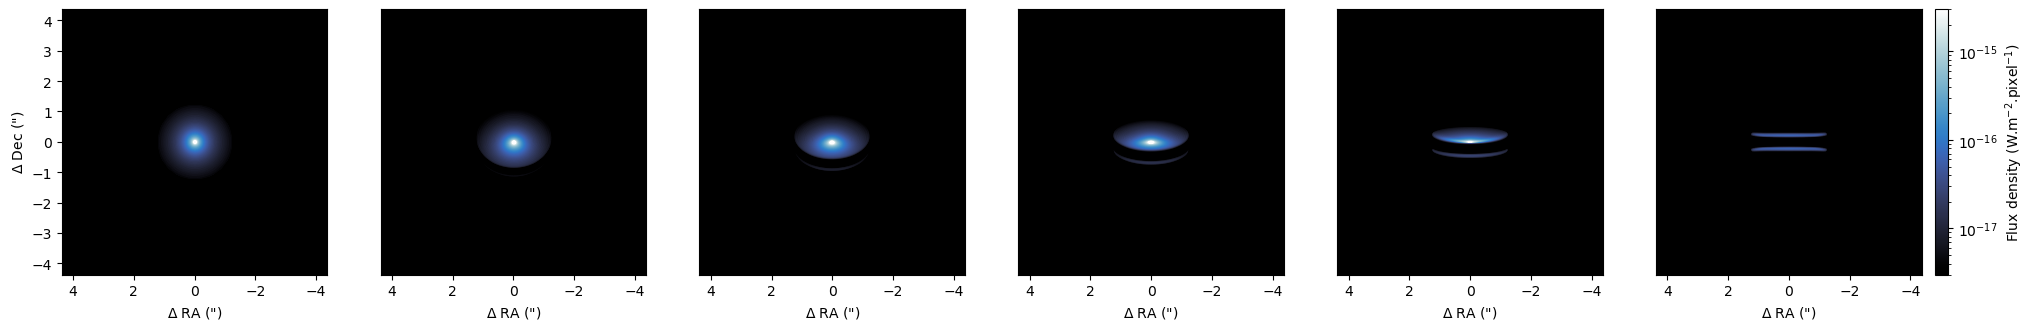

In [36]:
# image
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1,6, figsize=(24,4))
axes = [ax2, ax3, ax4, ax5]
vmax = 3e-15
image_1um.plot(0, ax=ax1, vmax=vmax, colorbar=False)
j=0
for i in axes:
    j+=1
    image_1um.plot(j, ax=i, vmax=vmax, colorbar=False, no_ylabel=True, no_yticks=True)
image_1um.plot(5, ax=ax6, vmax=vmax, colorbar=True, no_ylabel=True, no_yticks=True)
plt.show()

In [49]:
image_1um.header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    5 / number of data axes                            
NAXIS1  =                  301 / length of data axis 1                          
NAXIS2  =                  301 / length of data axis 2                          
NAXIS3  =                    6 / length of data axis 3                          
NAXIS4  =                    1 / length of data axis 4                          
NAXIS5  =                    8 / length of data axis 5                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
WAVE    =                   1. / wavelength [microns]                           
CTYPE1  = 'RA---TAN'        

In [40]:
2e-13 * 2e33 / (1.5e13**2) / (3600 * 24 * 365)

5.63729635266926e-14